## Look Basis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

base = pd.read_csv(r"data csv\train.csv")
base.tail(4)

PassengerId  Survived  Pclass                                      Name  \
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

## Certify info

In [2]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking the ``cardinality``

In [3]:
base.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Cheking with grapich

<BarContainer object of 12 artists>

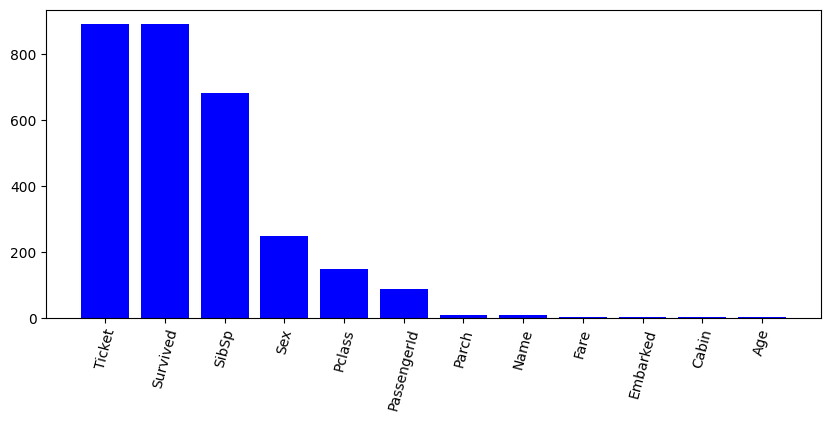

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))

x = base.nunique().index.sort_values(ascending=False)
y = base.nunique().sort_values(ascending=False).values

ax.tick_params(axis='x', labelrotation=75)

ax.bar(x, y, color='blue')

## Verify the amount of values less than 100

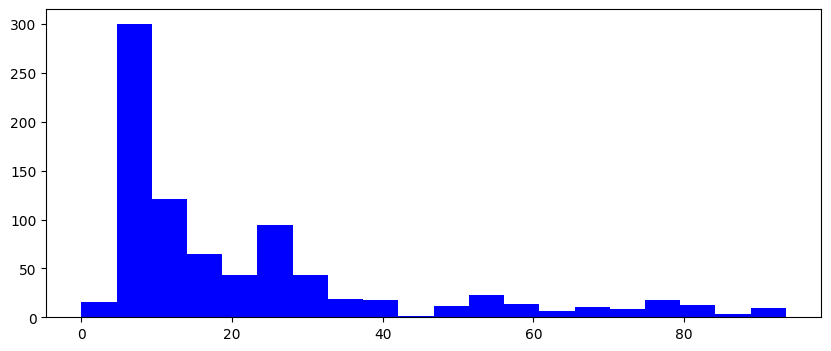

In [5]:
# plot:
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(base[base['Fare'] < 100].Fare, bins=20, color='blue')
plt.show()

## Boxplot
- <strong>The ``BOXPLOT`` help us for see the outliers</strong>


       |-----|         <- Whisker (Upper)
       |     |       _______________   
       |     |      |               |   
       |     |  --- |   Box Plot    | --- <- Box (IQR) 
       |     |      |_______________|   
       |     |         _______   
       |-----|         <- Whisker (Lower)  


## How do I get values ​​above the maximum value?

- max = Q3 + 1.5*interquartile
- min = Q1 - 1.5*interquartile


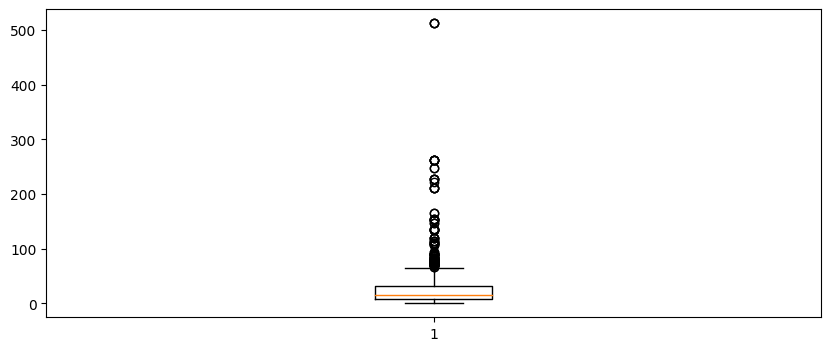

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
boxplot = ax.boxplot(base['Fare']) # Pass the value X
plt.show()

In [7]:
base['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
# Define the interquartile
Q1 = base['Fare'].describe()['25%']
Q3 = base['Fare'].describe()['75%']
interquartile = Q3 - Q1

# calculate the max  value
val_max = Q3 + 1.5*interquartile
print(f"Maximum value :{val_max}")

Maximum value :65.6344


## Filtering the value above the maximum

In [9]:
above_max = base[base['Fare'] > val_max]
display(above_max)

# It has 116 values above the max

PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ...    ...   
846                           Sage, Mr. Douglas Bullen    male   NaN      8   
849       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female   NaN      1   
856         Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0      1   
863                  Sage, Miss. Dorothy Edith "Dolly"  female   NaN      8   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   

     Parch    Ticket      Fare        Cabin Embarked  
1        0  PC 17599   71.2833          C85        C  
27       2     19950  263.0000  C23 C25 C27        S  
31       0  PC 17569  146.5208          B78        C  
34       0  PC 17604   82.1708          NaN        C  
52       0  PC 17572   76.7292          D33        C  
..     ...       ...       ...          ...      ...  
846      2  CA. 2343   69.5500          NaN        S  
849      0     17453   89.1042          C92        C  
856      1     36928  164.8667          NaN        S  
863      2  CA. 2343   69.5500          NaN        S  
879      1     11767   83.1583          C50        C  

[116 rows x 12 columns]

## To check if there is relationship between the Parch column and age

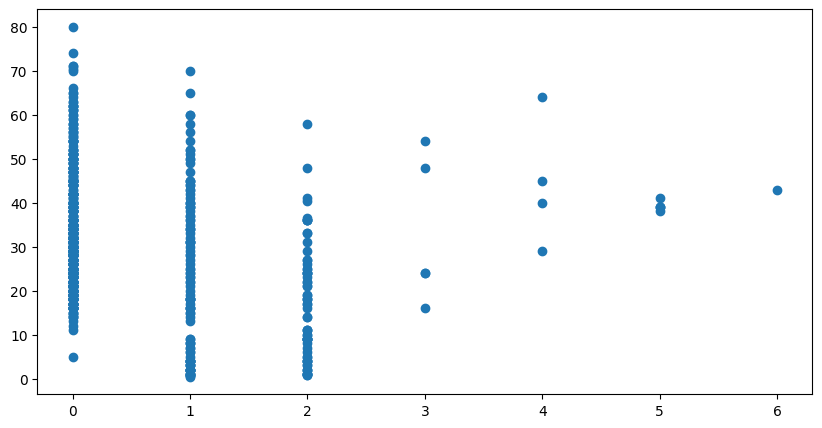

'\n It could be a parent who has 1 or more children or a child who has 1 parent or 1 dad and 1 mother\n'

In [10]:
fig, ax = plt.subplots(figsize= (10,5))

x = base['Parch']
y = base['Age']

ax.scatter(x, y)

plt.show()

"""
 It could be a parent who has 1 or more children or a child who has 1 parent or 1 dad and 1 mother
"""

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Correlation </title>
    <style>
        body {
            background-color: black;
            color: #00bfff; /* Azul brilhante */
            font-family: Arial, sans-serif;
        }
        h1, p {
            color: #00bfff;
        }
        code {
            color: #ffae42; /* Cor diferente para o código */
            background-color: black;
            padding: 2px 4px;
            border-radius: 3px;
        }
    </style>
</head>
<body>
    <h1>Correlation KDE</h1>
    <p>- We can use <code>.plotting.scatter_matrix()</code> of the <strong>PANDAS</strong> or <code>.pairplot()</code> of the <strong>SEABORN</strong></p>
</body>
</html>


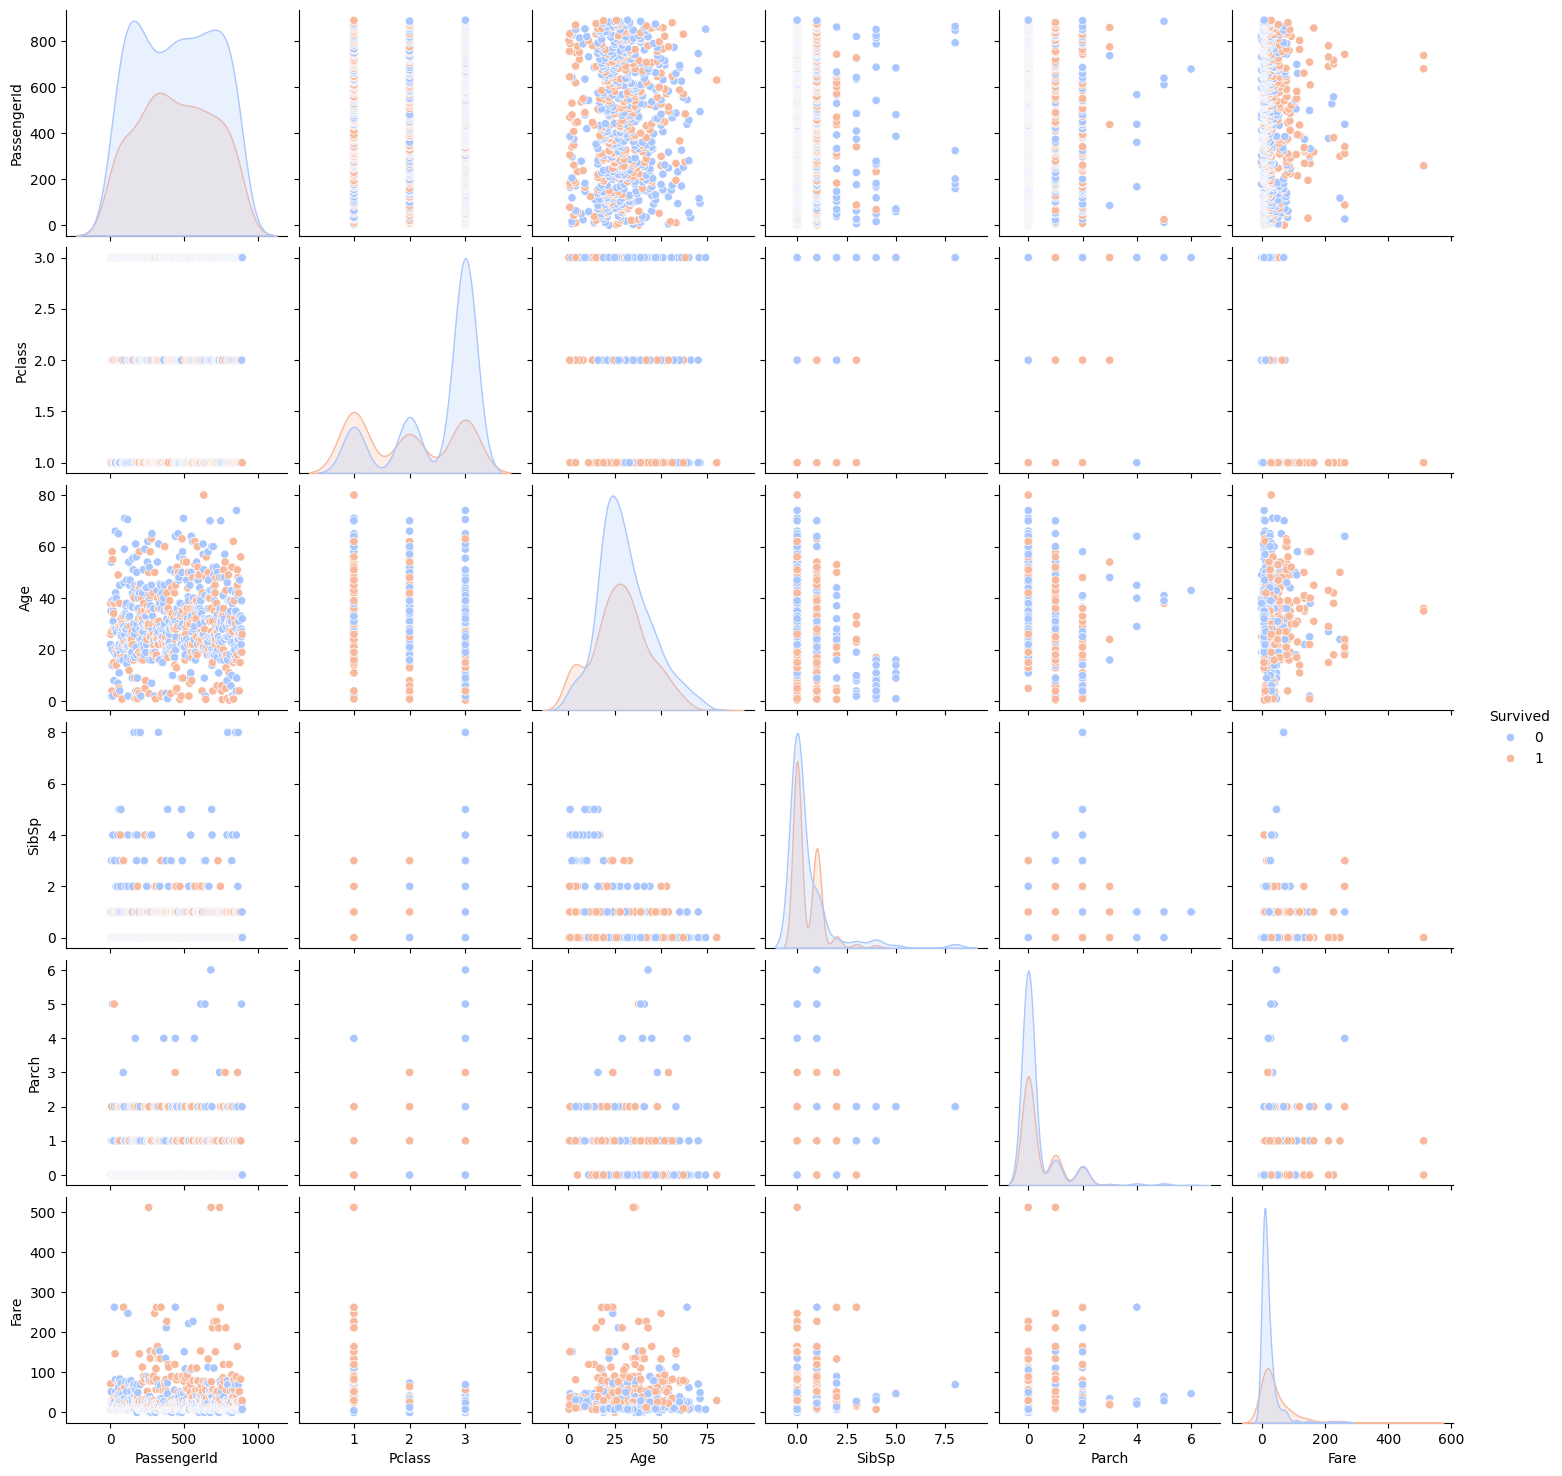


    ORANGE = Survived
    BLUE = Dead



In [11]:
# SEABORN
import seaborn as sns


sns.pairplot(base, hue="Survived", # HUE = Column to be divided
             palette="coolwarm",   # COLOR
             diag_kind="kde")     # Type of graphic

plt.show()

print("""
    ORANGE = Survived
    BLUE = Dead
""")

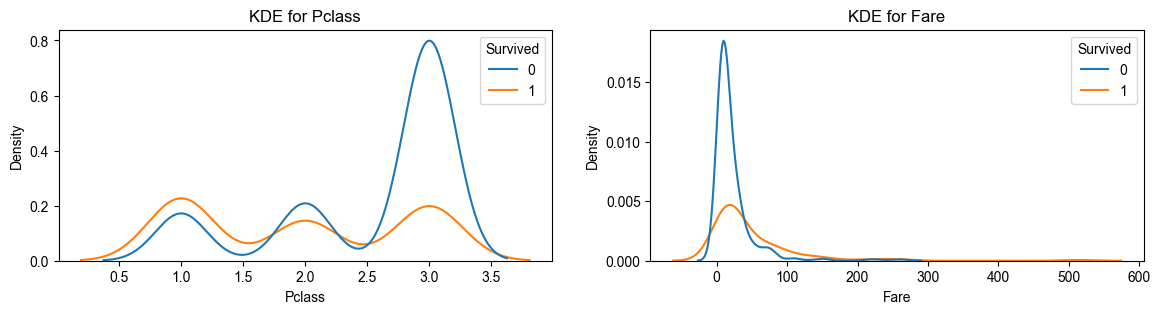

In [12]:
# KDE For Pclass
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,3))

sns.kdeplot(data=base, x="Pclass", hue="Survived", ax= ax[0])
ax[0].set_title("KDE for Pclass")

sns.kdeplot(data=base, x="Fare", hue="Survived", ax= ax[1])
ax[1].set_title("KDE for Fare")

sns.set_theme(style="whitegrid")
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Correlation </title>
    <style>
        body {
            background-color: black;
            color: #00bfff; /* Azul brilhante */
            font-family: Arial, sans-serif;
        }
        h1, p {
            color: #00bfff;
        }
        code {
            color: #ffae42; /* Cor diferente para o código */
            background-color: black;
            padding: 2px 4px;
            border-radius: 3px;
        }
    </style>
</head>
<body>
    <h1>Correlation HeatMap</h1>
</body>
</html>


## Datas for correlation

In [13]:
base_corr = base[["PassengerId",
                 "Survived",
                 "Pclass",
                 "Sex",
                 "Age",
                 "SibSp",
                 "Parch",
                 "Fare"]]

base_corr["Sex"] = base_corr["Sex"].replace({"male": 1, "female": 0}) # Replace the Sex per number



C:\Users\WIN11\AppData\Local\Temp\ipykernel_51860\3564374539.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_corr["Sex"] = base_corr["Sex"].replace({"male": 1, "female": 0}) # Replace the Sex per number


In [14]:
base_corr

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0              1         0       3    1  22.0      1      0   7.2500
1              2         1       1    0  38.0      1      0  71.2833
2              3         1       3    0  26.0      0      0   7.9250
3              4         1       1    0  35.0      1      0  53.1000
4              5         0       3    1  35.0      0      0   8.0500
..           ...       ...     ...  ...   ...    ...    ...      ...
886          887         0       2    1  27.0      0      0  13.0000
887          888         1       1    0  19.0      0      0  30.0000
888          889         0       3    0   NaN      1      2  23.4500
889          890         1       1    1  26.0      0      0  30.0000
890          891         0       3    1  32.0      0      0   7.7500

[891 rows x 8 columns]

In [15]:
# Not visual way
base_corr.corr()

PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.000000

There is a ``negative`` relation betwen:
-  Pclass and Fare
-  Survived and Sex



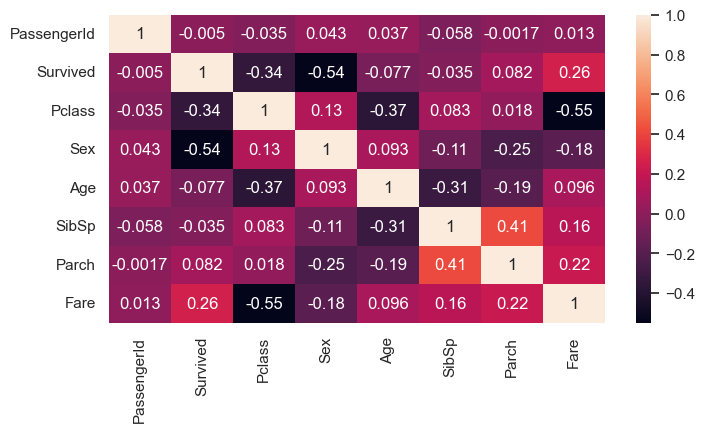

In [16]:
# Visual way
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(data= base_corr.corr(), annot=True)

print("""There is a ``negative`` relation betwen:
-  Pclass and Fare
-  Survived and Sex
""")
plt.show()

## Handling null values

In [17]:
base.loc[base['Cabin'].isnull(), "Sex"].value_counts()

Sex
male      470
female    217
Name: count, dtype: int64

In [18]:
# Se the null values if there is a relation to exist null values of AGE
display(base.loc[base.Age.isnull(), "Pclass"].value_counts())
display(base.loc[base.Age.isnull(), "Sex"].value_counts())
display(base.loc[base.Age.isnull(), "Survived"].value_counts())

Pclass
3    136
1     30
2     11
Name: count, dtype: int64

Sex
male      124
female     53
Name: count, dtype: int64

Survived
0    125
1     52
Name: count, dtype: int64

- Se the median of the age to replace null values

In [19]:
# Useing LOC to do the mean only for not null values
base.loc[base['Age'].isnull(),"Age"] = base["Age"].mean()
display(f'Quantidade de dados nulos: {base["Age"].isnull().sum()}') # Don't there is more null values in age

'Quantidade de dados nulos: 0'

# Using the Data Profiling
- This library is for a visualization of the dataset

In [20]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(base, title="Pandas Profiling Report")

display(profile)

profile.to_file("Analysis_Titanic.html") # Save the overview in html


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Correlation</title>
    <style>
        body {
            background-color: black;
            color: #00bfff; /* Azul brilhante */
            font-family: Arial, sans-serif;
        }
        h1 {
            font-size: 3em;
            color: #fff;
            background: linear-gradient(to right, #ff007f, #00bfff);
            padding: 20px;
            text-align: center;
            border-radius: 10px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
            background-image: url('https://images.unsplash.com/photo-1494388851334-f441dba0b09a?crop=entropy&cs=tinysrgb&fit=max&ixid=MnwzNjUyOXwwfDF8c2VhY2h8MjR8fGRhdGF8ZW58MHx8fHwxNjg3NzE2NTc5&ixlib=rb-1.2.1&q=80&w=1080');
            background-size: cover;
            background-blur: 5px;
            color: white;
        }
        h1 span {
            background-color: rgba(0, 0, 0, 0.5);
            padding: 0 10px;
            border-radius: 5px;
        }
        p {
            color: #00bfff;
        }
        code {
            color: #ffae42;
            background-color: black;
            padding: 2px 4px;
            border-radius: 3px;
        }
    </style>
</head>
<body>
    <h1><span>Professional Data Analysis</span></h1></body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Data Definitions</title>
    <style>
        body {
            background-color: black;
            color: #00bfff;
            font-family: Arial, sans-serif;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin-top: 20px;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }
        th {
            background-color: #00bfff;
            color: white;
        }
        tr:nth-child(even) {
            background-color: #333;
        }
        td {
            color: #ffae42;
        }
    </style>
</head>
<body>
    <h1>Data Definitions for Titanic Dataset</h1>
    <table>
        <thead>
            <tr>
                <th>Column</th>
                <th>Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>survival</td>
                <td>Survival status: 0 = No, 1 = Yes</td>
            </tr>
            <tr>
                <td>pclass</td>
                <td>Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd</td>
            </tr>
            <tr>
                <td>sex</td>
                <td>Sex of the passenger</td>
            </tr>
            <tr>
                <td>age</td>
                <td>Age in years</td>
            </tr>
            <tr>
                <td>sibsp</td>
                <td>Number of siblings/spouses aboard the Titanic</td>
            </tr>
            <tr>
                <td>parch</td>
                <td>Number of parents/children aboard the Titanic</td>
            </tr>
            <tr>
                <td>ticket</td>
                <td>Ticket number</td>
            </tr>
            <tr>
                <td>fare</td>
                <td>Passenger fare</td>
            </tr>
            <tr>
                <td>cabin</td>
                <td>Cabin number</td>
            </tr>
            <tr>
                <td>embarked</td>
                <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
            </tr>
        </tbody>
    </table>
</body>
</html>


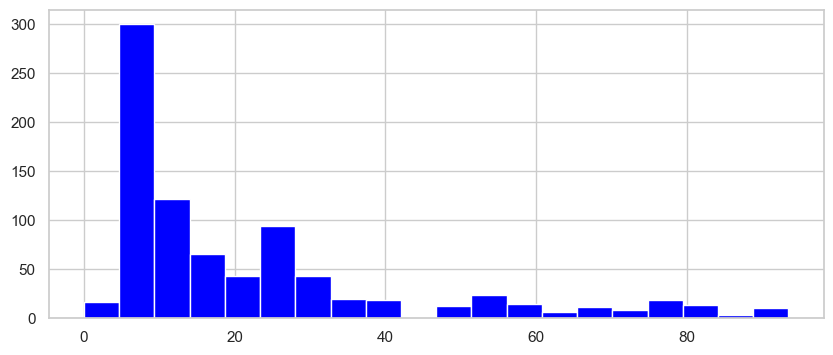

In [21]:
# plot:
fig, ax = plt.subplots(figsize=(10, 4))

ax.hist(base[base['Fare'] < 100].Fare, bins=20, color='blue')

plt.show()

<b>For this fare, there is a larg concentration of small values (cheep tickets) and few for expensive tickets</b>
<hr>

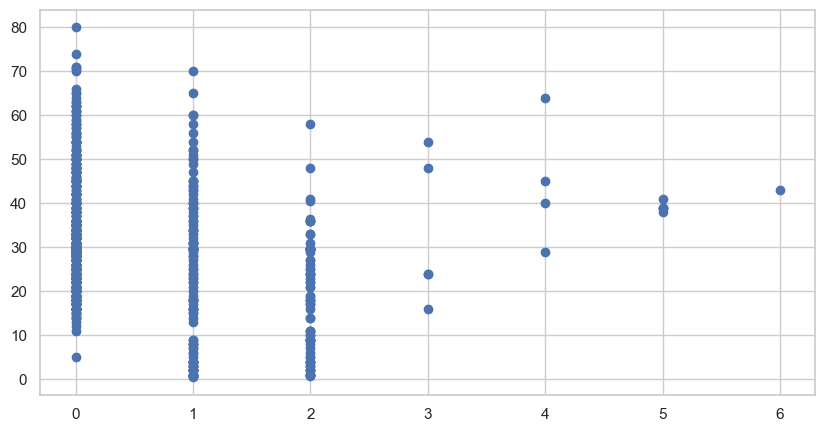

In [22]:
fig, ax = plt.subplots(figsize= (10,5))

x = base['Parch']
y = base['Age']

ax.scatter(x, y)

plt.show()

<b>Most people under 40 have a partner, perhaps their husband, wife, child, friend or all of them. It's make sense </b>
<hr>

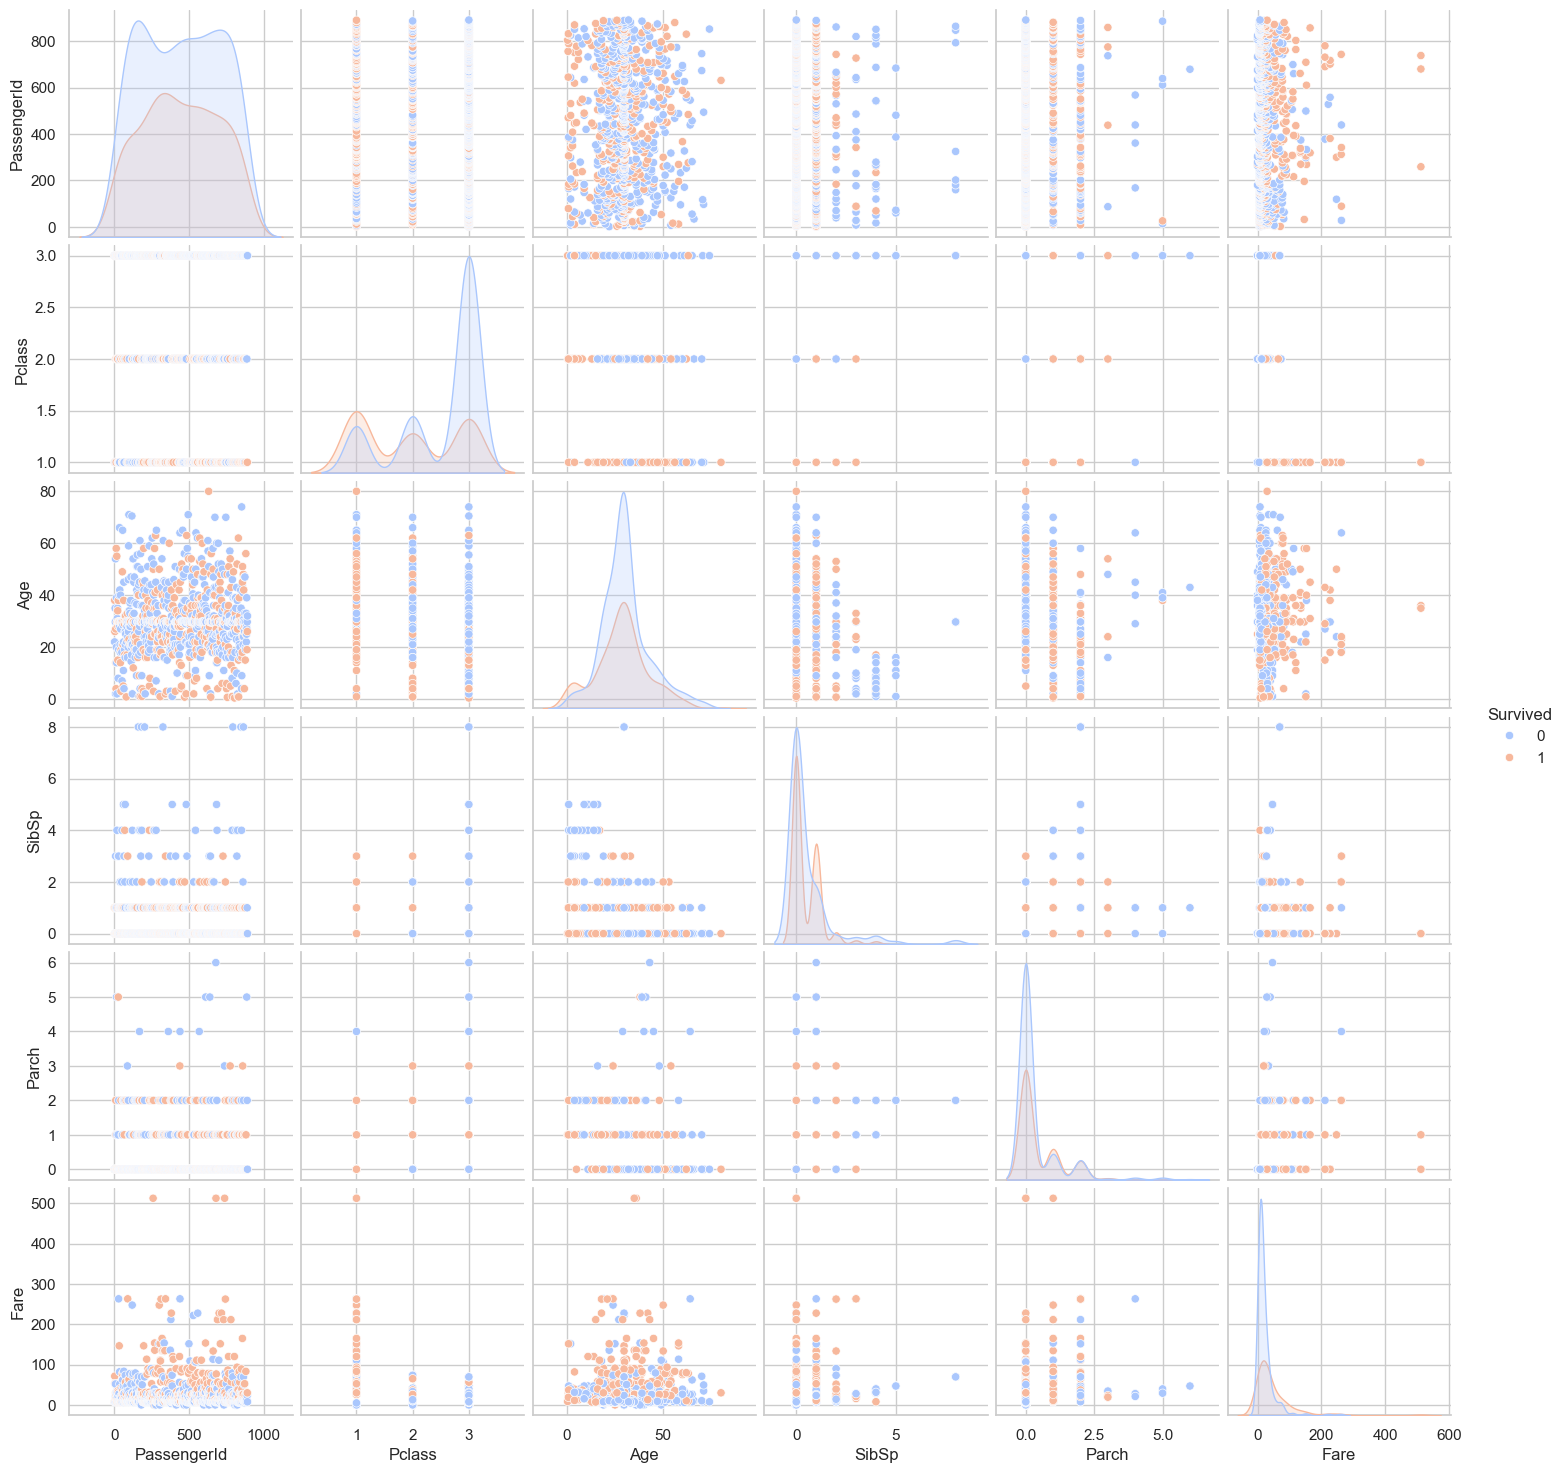

In [23]:
# SEABORN
import seaborn as sns


sns.pairplot(base, hue="Survived",
             palette="coolwarm",   
             diag_kind="kde")     

plt.show()


<b>Characteristics of people most likely to survive:
- Under 40
- ``PCLASS`` bellow 1.5 (cheeper). || MAYBE the height of this class protected more in the accident
- People with less than 2 ``partners`` || MAYBE It could be because these people were more concerned about saving themselves 
- Those who survived longer were those who paid more cheep in the ``fare``, but the large amount paid this, so makes sense</b>
<hr>

In [33]:
base['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

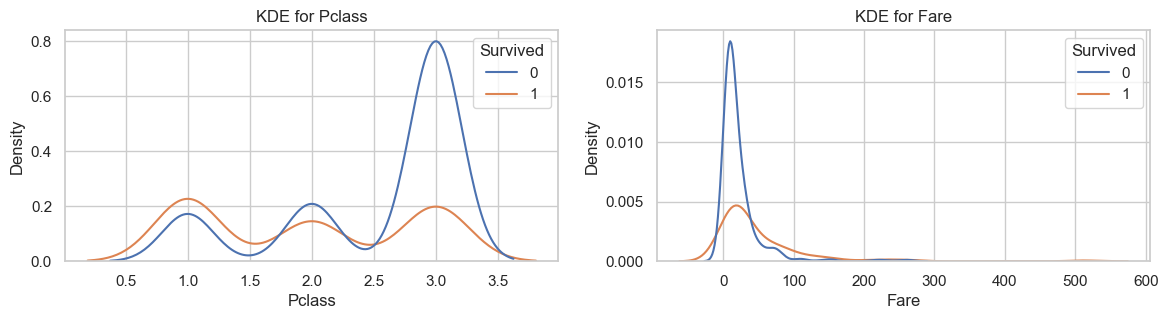

In [35]:
# KDE For Pclass
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,3))

sns.kdeplot(data=base, x="Pclass", hue="Survived", ax= ax[0])
ax[0].set_title("KDE for Pclass")

sns.kdeplot(data=base, x="Fare", hue="Survived", ax= ax[1])
ax[1].set_title("KDE for Fare")

plt.show()

<b>As we can see here, people who paid more in the ``fare``, did are more likely to not survive, maybe that part of the ship was more fragile than other parts and people under 40 with fewer partners are more likely to survive </b>
<hr>